##Методические указания

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


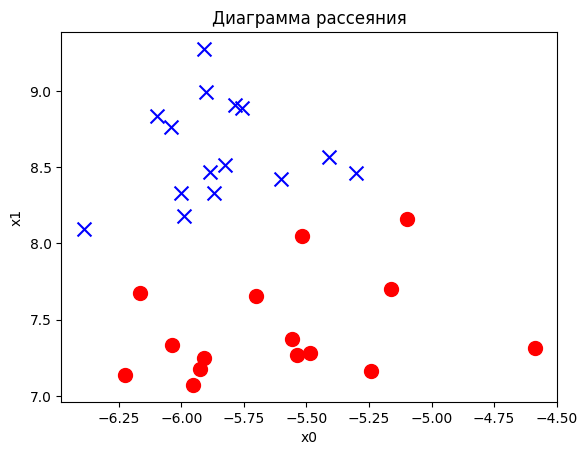

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)


SVC(C=100, kernel='linear')

In [ ]:
svm_linear.coef_


array([[-2.49920793,  6.14683189]])

In [ ]:
svm_linear.intercept_


array([-64.2533988])

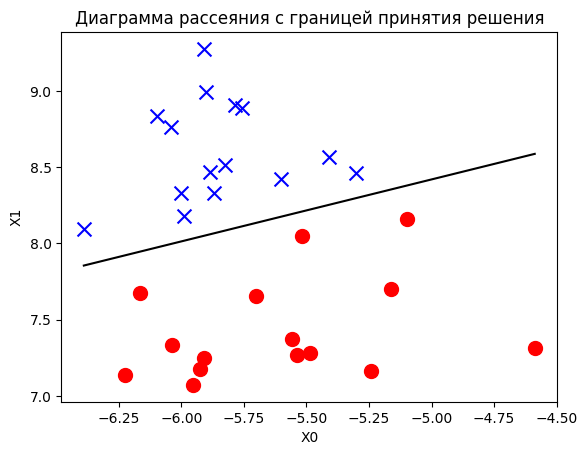

In [ ]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_linear.support_vectors_


array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [ ]:
svm_linear.support_


array([ 0,  8, 29], dtype=int32)

In [ ]:
svm_linear.n_support_


array([1, 2], dtype=int32)

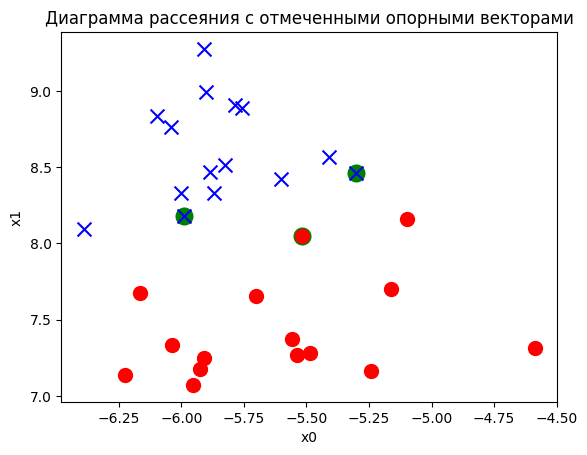

In [ ]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()


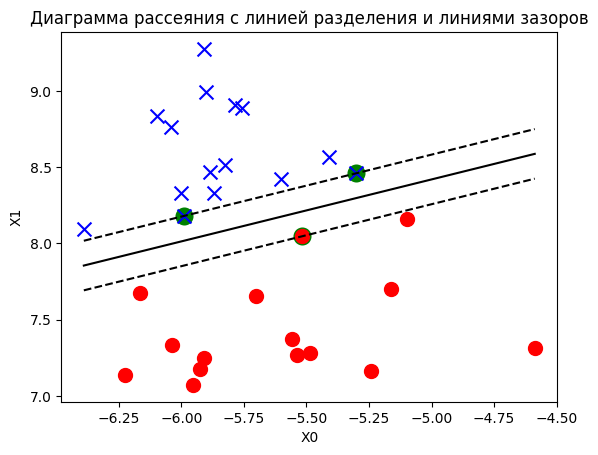

In [ ]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()


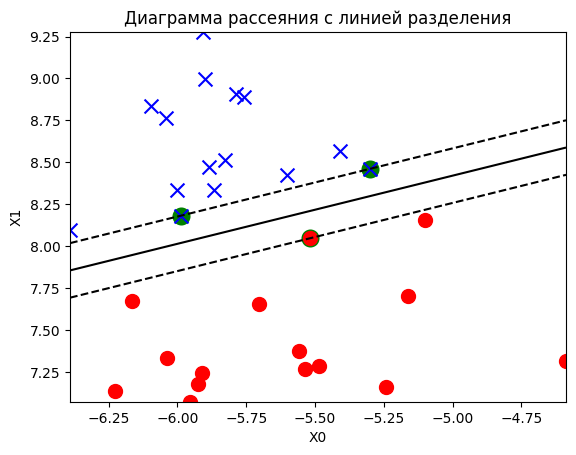

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()


In [ ]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()


In [ ]:
y_pred =  svm_linear.predict(X)


In [ ]:
from sklearn import metrics
metrics.accuracy_score(y, y_pred)


1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)


array([[15,  0],
       [ 0, 15]])

In [ ]:
observation_new = [[-5.25, 7.5]]


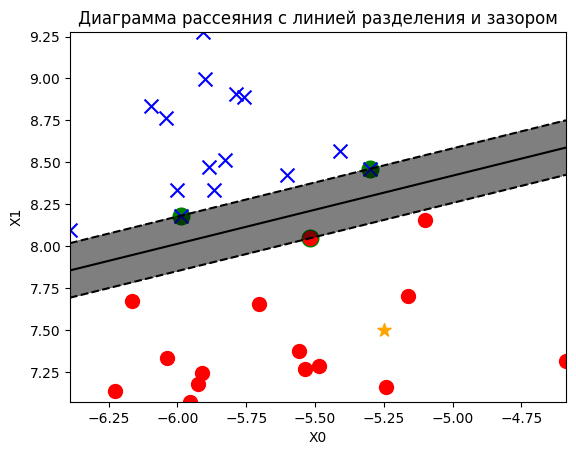

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)


In [ ]:
svm_linear.decision_function(observation_new)


array([-5.03131797])

In [ ]:
svm_linear.predict(observation_new)


array([0])

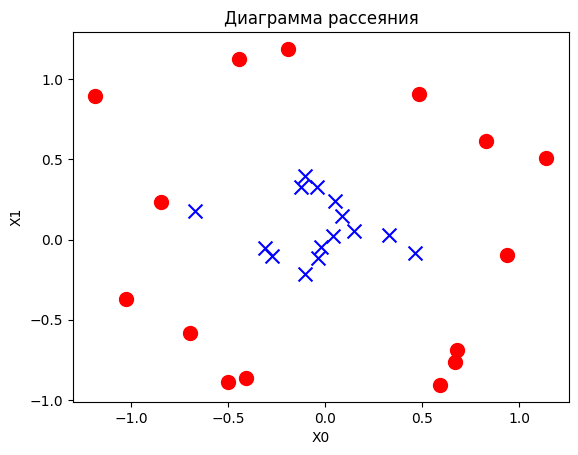

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()


In [ ]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)


In [ ]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_


array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

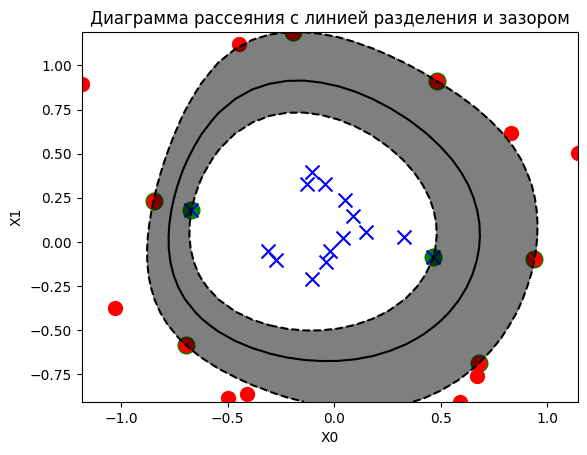

In [ ]:
plot_decision_regions(X, y, svm_rbf)


In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)


array([[7, 8],
       [8, 7]])

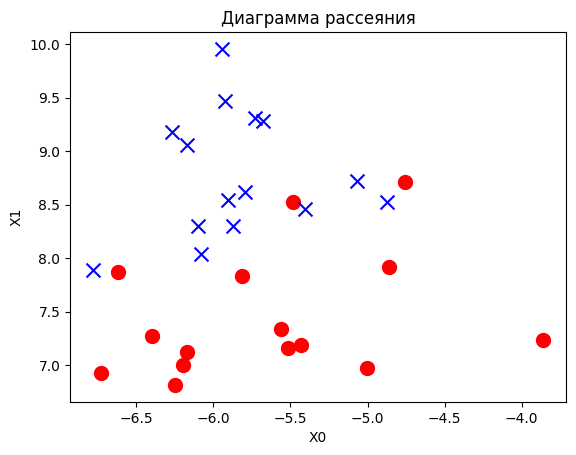

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()


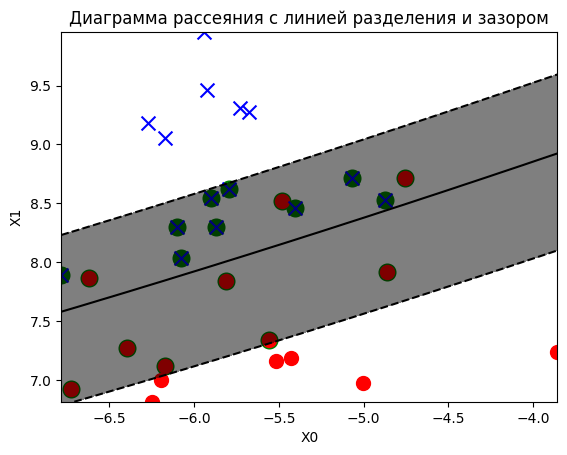

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)
plot_decision_regions(X, y, svm_poly)

In [ ]:
svm_poly.n_support_


array([9, 9], dtype=int32)

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)


array([[15,  0],
       [ 0, 15]])

##Задания для самостоятельного выполнения

#### 1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

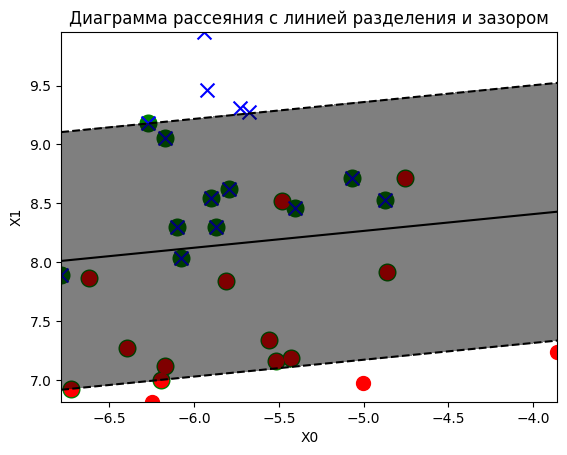

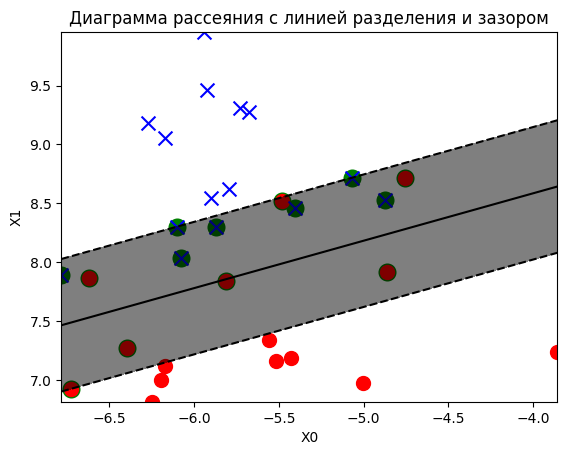

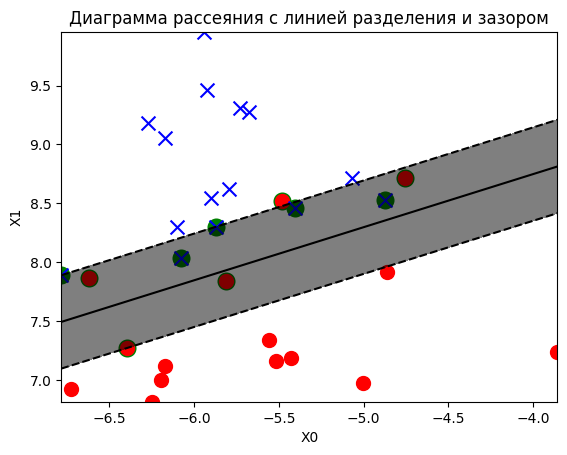

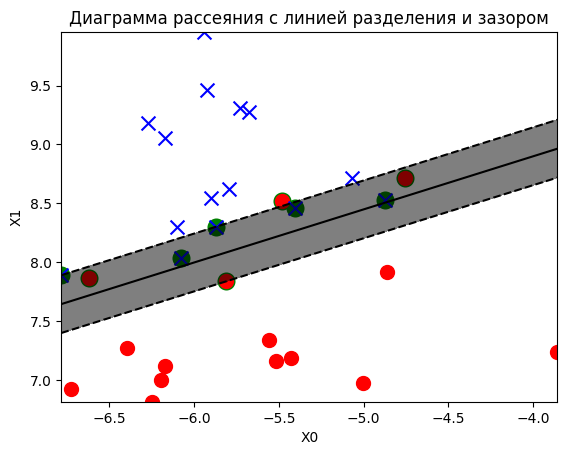

In [ ]:
C_values = [0.1, 1, 10, 100]

for C in C_values:
    model = SVC(kernel='linear', C=C)

    model.fit(X, y)

    plot_decision_regions(X, y, model)

Контролировать ширину зазора в методе опорных векторов можно с помощью гиперпараметра C. Меньшее значение C приводит к более широкому зазору, но может допустить больше нарушений этого зазора. С другой стороны, более высокое значение C делает зазор более жестким, но может привести к меньшей ширине.

#### 2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

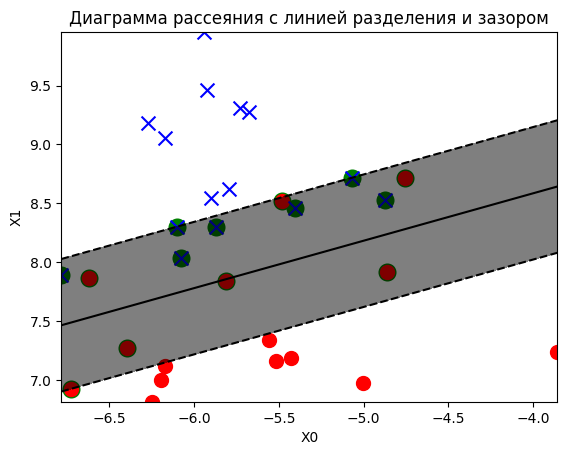

Предсказание для новой точки [[4.  2.5]]: [0]


In [ ]:
C = 1
model = SVC(kernel='linear', C=C)

model.fit(X, y)

# Визуализация границ решения и зазора
plot_decision_regions(X, y, model)

new_point = np.array([[4.0, 2.5]])  # Новые координаты точки

prediction = model.predict(new_point)

print(f'Предсказание для новой точки {new_point}: {prediction}')

Модель успешно справляется с предсказаниями, и наличие точки внутри зазора не оказывает существенного влияния на результат.

####3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

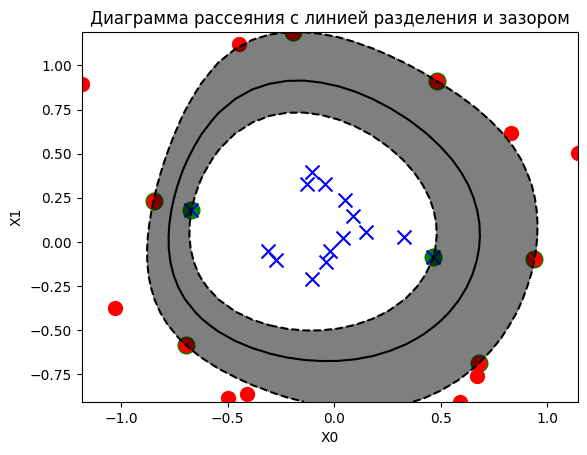

In [ ]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)


plot_decision_regions(X, y, svm_rbf)

In [ ]:
y_pred = svm_rbf.predict(X)
metrics.accuracy_score(y, y_pred)


1.0

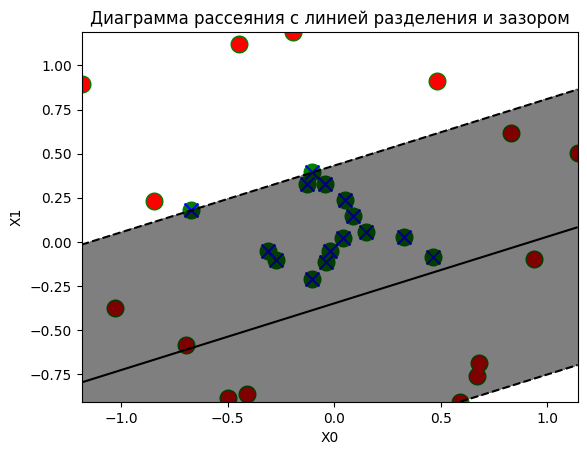

In [ ]:
svm_rbf = SVC(kernel='linear', C=100).fit(X, y)
plot_decision_regions(X, y, svm_rbf)


In [ ]:
y_pred = svm_rbf.predict(X)
metrics.accuracy_score(y, y_pred)


0.7

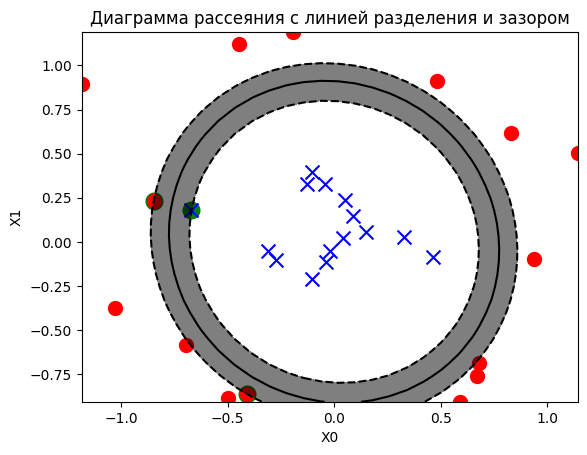

In [ ]:
svm_rbf = SVC(kernel='poly', degree = 2, C = 100).fit(X, y)
plot_decision_regions(X, y, svm_rbf)


In [ ]:
y_pred = svm_rbf.predict(X)
metrics.accuracy_score(y, y_pred)


1.0

#### 4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

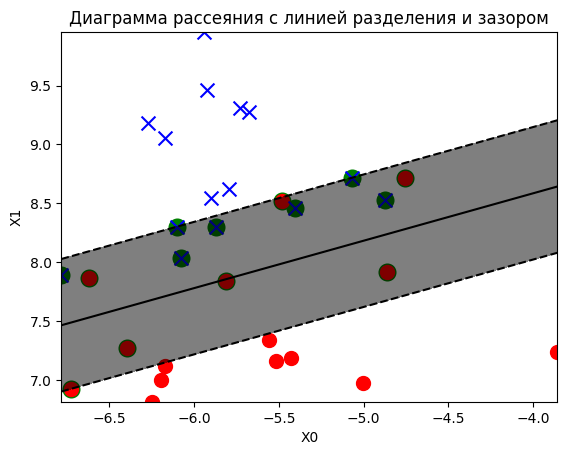

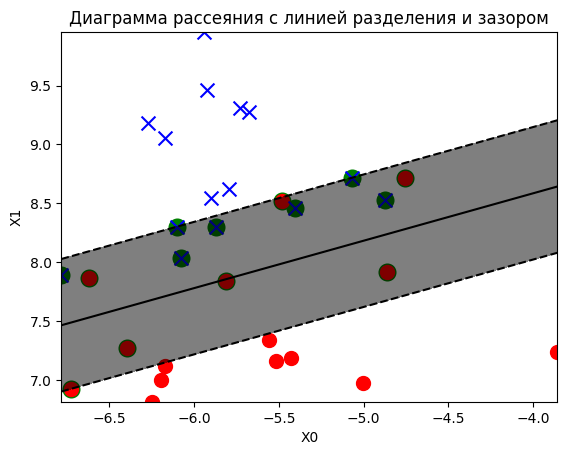

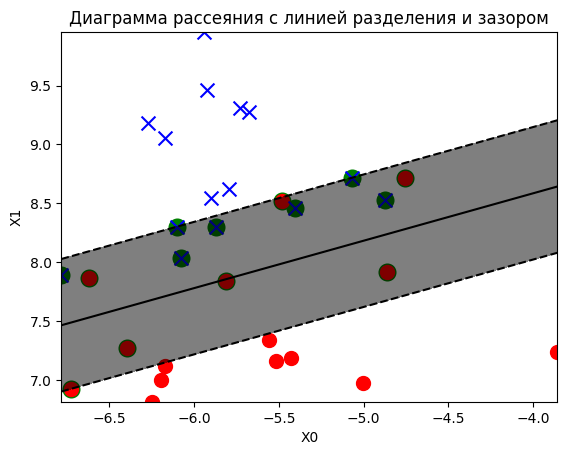

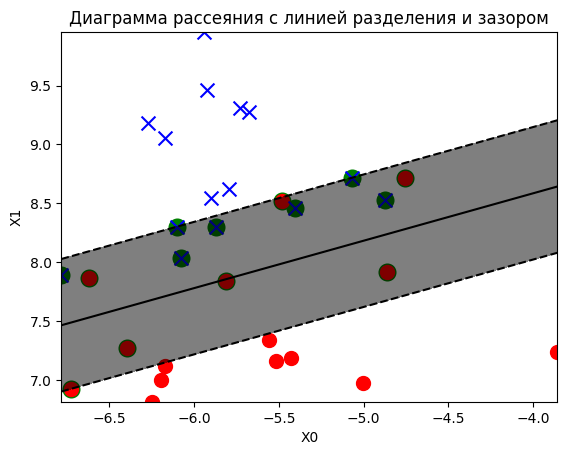

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

C_values = [0.1, 1, 10, 100]

for C in C_values:
    svm_rbf = SVC(kernel='linear', C=C)

    svm_rbf.fit(X, y)

    plot_decision_regions(X, y, model)

Более высокое значение C в методе опорных векторов приводит к созданию более жесткого зазора, что означает, что модель будет стремиться правильно классифицировать больше обучающих точек. Это может сделать предсказания более надежными, но в то же время делает модель более чувствительной к выбросам или неточностям в данных.

Наоборот, более низкое значение C приводит к созданию более мягкого зазора, что означает, что модель может допускать нарушения зазора, но при этом может быть менее чувствительной к выбросам или нестандартным точкам данных.

Таким образом, выбор оптимального значения C зависит от конкретной задачи и особенностей данных, и он может быть подобран методом кросс-валидации или другими методами оценки модели.

#### 5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.


In [ ]:
from sklearn.svm import LinearSVC as LS


In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)
svm_LS = LS().fit(X, y)
y_pred = svm_LS.predict(X)
metrics.accuracy_score(y, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8

#### 6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Определение параметров для подбора
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Только для полиномиального ядра
}

svm_model = SVC()

grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'C': 1, 'degree': 2, 'kernel': 'rbf'}
Accuracy: 0.8966666666666666


#### 7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [ ]:
import time

X_large, y_large = make_classification(n_samples=5000, n_features=5, n_classes=2, random_state=42)

X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(X_large, y_large, test_size=0.3, random_state=42)

# Создание модели SVM с некоторыми параметрами
svm_model_large = SVC(kernel='rbf', C=1)

# Измерение времени обучения
start_time = time.time()
svm_model_large.fit(X_train_large, y_train_large)
training_time = time.time() - start_time

print(f"Время, затраченное на обучение с {len(X_large)} точками: {training_time:.2f} секунд")


Время, затраченное на обучение с 5000 точками: 0.30 секунд


#### 8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

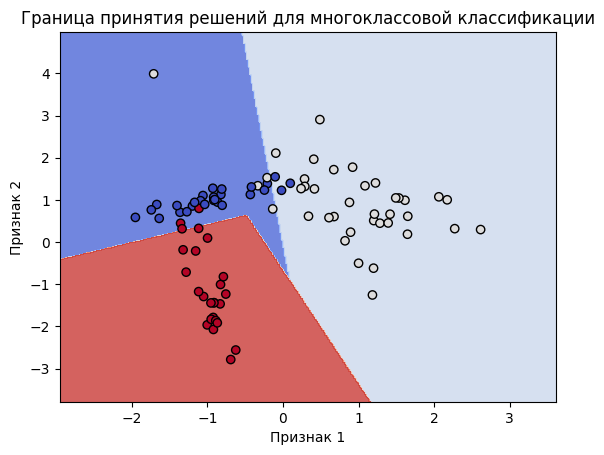

In [ ]:
# Создание визуализируемого многоклассового датасета
X_multi, y_multi = make_classification(n_samples=300, n_features=2, n_informative=2,
                                       n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=42)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

svm_model_multi = SVC(kernel='linear', C=1)

svm_model_multi.fit(X_train_multi, y_train_multi)

plot_decision_regions_multi(X_test_multi, y_test_multi, svm_model_multi)


#### 9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение модели SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = svm_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

# Вывод отчета по классификации
print("Отчет по классификации:")
print(classification_report(y_test, y_pred))


Точность модели: 0.98
Отчет по классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



#### 10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

Среднеквадратичная ошибка (MSE): 2856.76
R^2 коэффициент детерминации: 0.47


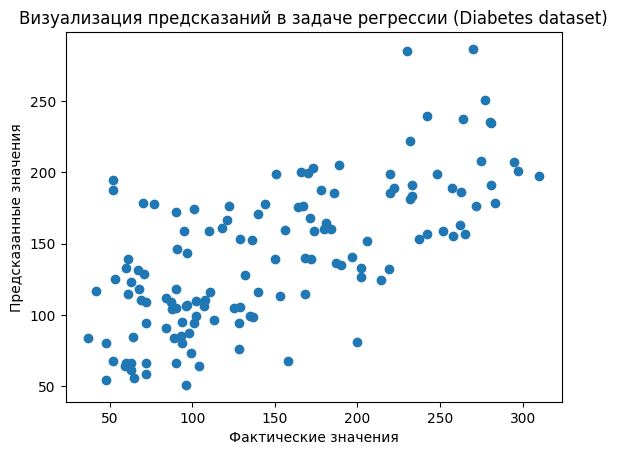

In [ ]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение модели SVM для регрессии
svm_regressor = SVR(kernel='linear', C=1)
svm_regressor.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = svm_regressor.predict(X_test)

# Оценка регрессии
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'R^2 коэффициент детерминации: {r2:.2f}')

# Визуализация предсказаний
plt.scatter(y_test, y_pred)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Визуализация предсказаний в задаче регрессии (Diabetes dataset)")
plt.show()
